# Comparing time to solve various queries

See [benchmark_results.ipynb](./benchmark_results.ipynb#The-query-test) for information on the configurations used for tests.

In [1]:
%matplotlib inline
from plot_utils import *
import matplotlib.pyplot as plt

QUERIES = {
    "query": "triple(s) matching (*, p, o)",
    "query2": "triple(s) matching (s, *, *)",
}

def show(qid):
    desc = QUERIES[qid]
    data = load_data(qid, "sophia", "sophia_lg","jena", "librdf", "jena", "n3js", "python")
    _, (ax0, ax1) = plt.subplots(figsize=(14,5), ncols=2)
    my_plot(data, 't_first', title=f"Time (in s) to retrieve the first {desc}", loglog=True, ax=ax0)
    my_plot(data, 't_query', title=f"Time (in s) to retrieve all {desc}", loglog=True, ax=ax1)

### The `query` test

This query looks for all the triples of the form `(*, rdf:type, dbo:Person)` in the `person_data` files.

* This query matches many triples in the dataset, so the first result is relatively easy to find.
* The total number of results is proportional to the size of the dataset (~12%).

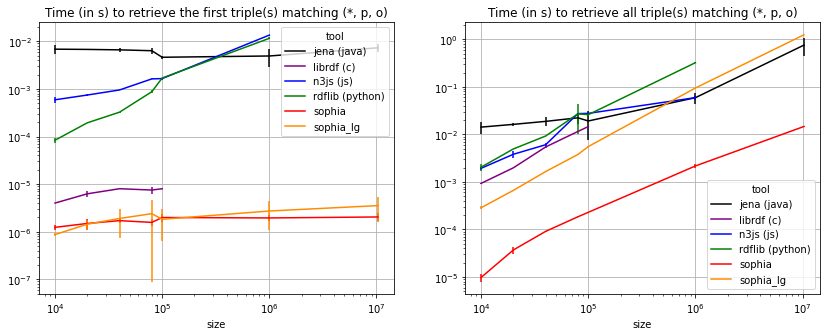

In [2]:
show('query')

### The `query2` test

This query matches all triples with subject `dbr:Vincent_Descombes_Sevoie`.
There are exactly 7 matching triples in all versions of the dataset.
Filtering approaches (such as `sophia_lg`) take linear time to find the first and all results,
while heavily indexed approapches (such as `sophia`) takes roughly constant time.

NB: interestingly, RDFlib (Python) is relatively fast, and in constant time for solving this query, while it took it linear time to find the first result of the previous one. Possibly, it generates all the results before returning the first one...


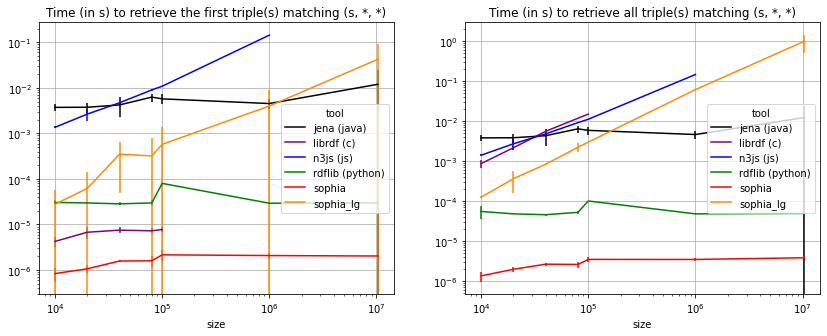

In [3]:
show('query2')